<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: 

***

This assignment is due on Canvas by **11:59 PM on Friday November 22**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 15% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.15$. 

$\hat p$ should be p since his hypothesis is trying to figure out what the true proportion is. $\hat p$ is the sample proportion.  

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.15$.

The null hypothesis is that you assume the boring thing / = thing, and test that it is wrong. His test should be $H_1 > 0.15$ not $H_0$

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.15$ and $H_1: p > 0.15$, Bob computes a normalized test-statistic of $z = -1.4$ for the sample proportion and concludes that since $z = -1.4 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

This is wrong because you should plug your z test statistic into the normal cdf in order to get the probability of that z and use that to compare. z of -1.4 is not a valid probability to compare. 

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.15$ and $H_1: p > 0.15$. He computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

This is a 0.03% chance that you got your value if the null hypothesis is true. This is very different from your hypothesis has a 3% probability of being true.

---
[Back to top](#top)
<a id='p3'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [2]:
# this is computing our t stat
alpha = .025
t = stats.t.ppf(1-alpha/2, 14)
# these are all the means of the data
meancn = 451.3
meanc = 494.2
meann = 492.8
# these are all the standard deviations
stdcn = 31.9
stdc = 39.6
stdn = 45.2
# this is the sample size
n = 15
# this is a function for computing confidence intervals
def CI(mean, std, n, z):
    # this computes the std/square root of n
    low = std/np.sqrt(n)
    # this computes the upper and lower bound
    CL = mean - (low*t)
    CU = mean + (low*t)
    # this returns
    return CL, CU
# this calls the confidence interval function and stores results
cicncl, cicncu = CI(meancn, stdcn, n, t)
ciccl, ciccu = CI(meanc, stdc, n, t)
cincl, cincu = CI(meann, stdn, n, t)
# this nicely prints the results
print("Confidence Interval for Coffee+Nap: [", cicncl, ",", cicncu, "]")
print("Confidence Interval for Coffee: [", ciccl, ",", ciccu, "]")
print("Confidence Interval for Nap: [", cincl, ",", cincu, "]")

Confidence Interval for Coffee+Nap: [ 430.6298196583792 , 471.97018034162085 ]
Confidence Interval for Coffee: [ 468.54046578281555 , 519.8595342171844 ]
Confidence Interval for Nap: [ 463.5118447824056 , 522.0881552175944 ]


1. No since the confidence intervals overlap
2. We used t because our sample size is less than 30

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [3]:
# we don't have to remake variables since we used them above
# doing the t test
se = (stdn**2)/n
se += (stdc**2)/n
se = np.sqrt(se)
tstat = meann - meanc
tstat = tstat/se
# got our t stat above so now putting it into cdf to calculate probability
result = stats.t.cdf(tstat, 14)
# printing it nicely
print("Value is: ", result)

Value is:  0.4646915745027912


One tailed t test with difference of means is the test I used. <br>
$H_0 = \mu _1 - \mu_2 = 0$<br>
$H_1 = \mu _1 - \mu_2 < 0$<br>
$\mu_1 = nap$<br>
$\mu_2 = coffee$<br>
Well, since our value is .4647, which is a lot greater than 0.025, we failed the test and therefore have no reason to believe that taking a nap is better than drinking coffee. 

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [4]:
# coffee-nap versus coffee
# we don't have to remake variables since we used them above
# doing the t test
se = (stdcn**2)/n
se += (stdc**2)/n
se = np.sqrt(se)
tstat = meancn - meanc
tstat = tstat/se
# got our t stat above so now putting it into cdf to calculate probability
result = stats.t.cdf(tstat, 14)
# printing it nicely
print("Value is: ", result)

Value is:  0.0028072241978113082


One tailed t test with difference of means is the test I used. <br>
$H_0 = \mu _1 - \mu_2 = 0$<br>
$H_1 = \mu _1 - \mu_2 < 0$<br>
$\mu_1 = coffee+nap$<br>
$\mu_2 = coffee$<br>
Our significance level was 0.025 which is greater than 0.002807 so we have statistically significant evidence to conclude that taking a nap and drinking coffee is better than just drinking coffee.

In [5]:
# coffee-nap versus nap
# we don't have to remake variables since we used them above
# doing the t test
se = (stdcn**2)/n
se += (stdn**2)/n
se = np.sqrt(se)
tstat = meancn - meann
tstat = tstat/se
# got our t stat above so now putting it into cdf to calculate probability
result = stats.t.cdf(tstat, 14)
# printing it nicely
print("Value is: ", result)

Value is:  0.005760684686679225


One tailed t test with difference of means is the test I used. <br>
$H_0 = \mu _1 - \mu_2 = 0$<br>
$H_1 = \mu _1 - \mu_2 < 0$<br>
$\mu_1 = coffee+nap$<br>
$\mu_2 = nap$<br>
Since our signficance level is 0.025 and we got 0.005761 which is less than 0.025 so we have statistically significant evidence to conclude that taking a nap and drinking coffee is better than just taking a nap. 

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

In [6]:
# getting the chi2 values
left = stats.chi2.ppf(1-(0.025/2), 14)
right = stats.chi2.ppf(0.025/2, 14)
# plugging the chi2 values into equation to get interval
left = (14*(stdcn**2))/left
right = (14*(stdcn**2))/right
# taking the square root to get interval for std instead of variance
left = np.sqrt(left)
right = np.sqrt(right)
# printing it
print("The confidence interval for the standard deviation: [", left, ",", right, "]")

The confidence interval for the standard deviation: [ 22.388646811088417 , 54.068809045641665 ]


To get the confidence interval of the standard deviation, you use chi with the variance to compute the confidence interval of the variance, and then take the square root of that. The confidence interval for the standard deviation is [22.389, 54.0689]

---
[Back to top](#top)
<a id='p4'></a>

### [25 points] Problem 3 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [7]:
df = pd.read_csv("pootef.csv")
df.head()

,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
1,1,NaN,40,37
2,1,NaN,40,35
3,1,NaN,40,35
4,1,Oct 5 2018,40,36


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$.

$H_0 : p = 0.9$ <br>
$H_1 : p > 0.9$

**Part B**: Complete the function below to test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement? 

In [8]:
def z_test(bites, feedings, alpha=0.05):
    '''
    Function to test H1: p > 0.90 
    Returns p-value based on H0: p = 0.90 
    '''
    # calculate sample proportion
    phat = bites/feedings
    # store the proportion we are testing against
    ptrue = 0.9
    # calculate zstat based on p-value test formula
    zstat = ptrue*(1-ptrue)
    zstat = zstat/(feedings)
    zstat = np.sqrt(zstat)
    zstat = (phat-ptrue)/zstat
    # plug zstat into cdf and use this to get pvalue to return
    pvalue = 1-stats.norm.cdf(zstat)
    if pvalue > alpha:
        print(pvalue, ">", alpha)
    else:
        print(pvalue, "<=", alpha)
    return pvalue 
ates = df['Ate'].sum()
feds = df['Fed'].sum()
print("The p-value test result is: ", z_test(ates, feds, 0.05))

0.30131168747623693 > 0.05
The p-value test result is:  0.30131168747623693


Since the value is 0.3013 which is greater than 0.05, there is not sufficient evidence saying her feeding regime is better than the current feeding regime. 

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation. 

In [9]:
# selecting every 4th octopi starting from the 2
dfClean = df.loc[np.arange(2, len(df), 4)]
# sum up the number that ate and the number of feedings
ates = dfClean['Ate'].sum()
feds = dfClean['Fed'].sum()
# run the test on our new data set
print("The p-value test result is: ", z_test(ates, feds, 0.05))

0.044201239963196914 <= 0.05
The p-value test result is:  0.044201239963196914


If you take a systematic sample of every 4th day, then you get a reasonable p-value. This is due to the fact that the feeding regime is too good. The octopi eat really well on one day, get fat, and then feel full for a few days after, therefore not needing to eat as much for the next 3 days. An octopi's digestive system also goes along with this cycle. You take the systematic sample starting from the 2nd day since you need the old regime to clear out of their system.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 4 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "data science" in the United States has steadily increasing since 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `data_science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "data science" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2019. 

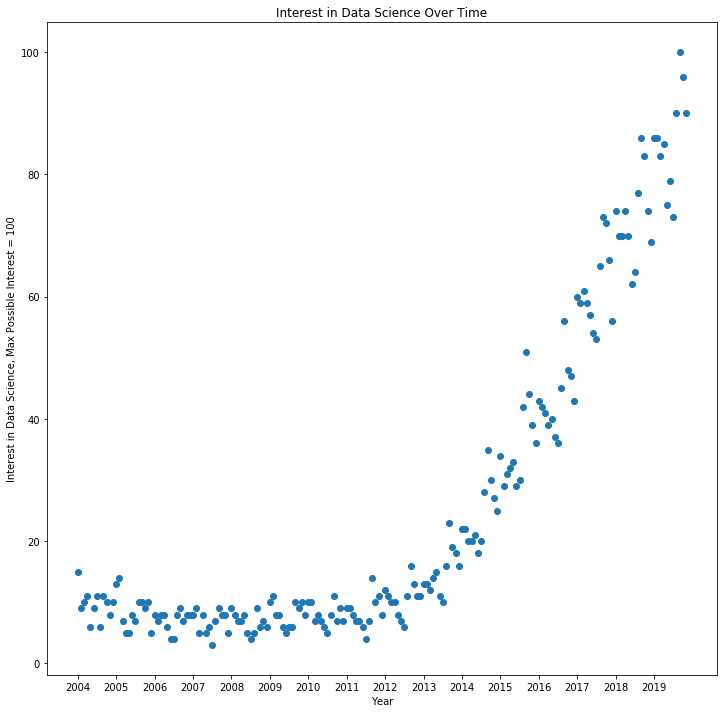

In [10]:
# take in the data
df = pd.read_csv('data_science_interest.csv')
# seperating the year and month
df['Year'] = df['Month'].astype(str).str[0:4]
df['Month'] = df['Month'].astype(str).str[5:7]
# chaning the year and month from string to int so you can work with it
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
# making the plot
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(df['Year']+((df['Month']-1)/12), df['Interest'])
# making the xticks, jan first is the start of each year which is just
# the year
plt.xticks(np.arange(2004, 2020, 1))
# labeling the graph
ax.set_title("Interest in Data Science Over Time")
ax.set_ylabel("Interest in Data Science, Max Possible Interest = 100")
ax.set_xlabel("Year")
plt.show()

**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in data science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in data science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

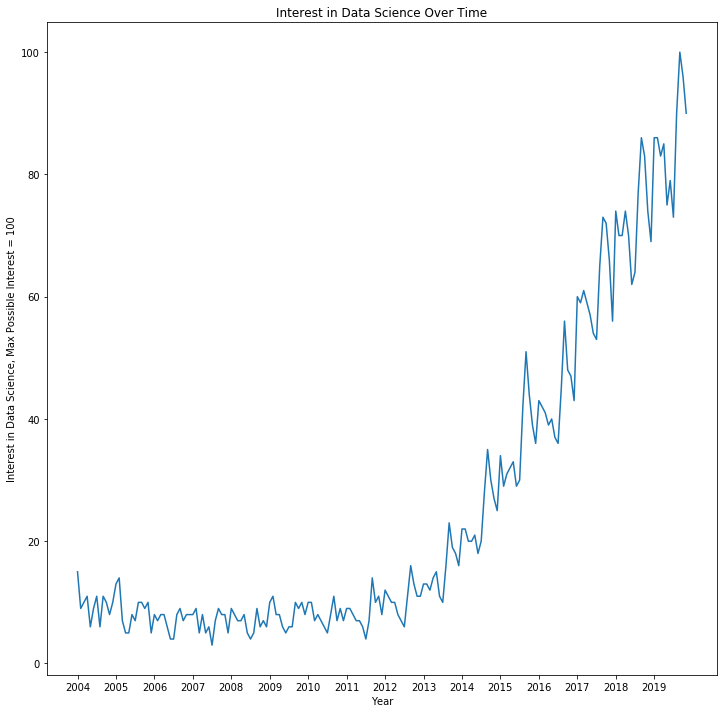

In [11]:
# making the plot
fig, ax = plt.subplots(figsize=(12,12))
# plotting the data
ax.plot(df['Year']+((df['Month']-1)/12), df['Interest'])
# setting the xticks so that they are jan first of each year
plt.xticks(np.arange(2004, 2020, 1))
# labeling the graph
ax.set_title("Interest in Data Science Over Time")
ax.set_ylabel("Interest in Data Science, Max Possible Interest = 100")
ax.set_xlabel("Year")
# showing the graph
plt.show()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in data science? During which months is interest in data science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in data science for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in data science during the fall months?

The plot suggests an annual trend. Every year the plot has the same little dips and rises in interest. The month with the highest interest is september. and the lowest is December. However there is also a really low dip in interest in June and July. This is shown by the values calculated below. The plot above also shows the annual trends well. There may be an increased interest in data science during the fall since people are getting back in school and back to classes. The decreased interest in June and July could be due to it being summer and everyone is relaxing, while the decrease in December is due to Chirstmas breaks and such and people relaxing.
$$
\begin{array}{c|c}
\textrm{Month} & \textrm{Average} \\
\hline 
\textrm{Jan} &  26.62\\ 
\textrm{Feb} &  25.56\\ 
\textrm{Mar} &  24.25\\ 
\textrm{Apr} &  24.69\\ 
\textrm{May} &  23.06\\ 
\textrm{Jun} &  21.63\\ 
\textrm{Jul} &  21.00\\ 
\textrm{Aug} &  26.94\\ 
\textrm{Sep} &  32.69\\ 
\textrm{Oct} &  29.44\\ 
\textrm{Nov} &  27.69\\ 
\textrm{Dec} &  20.87\\ 
\end{array}
$$

In [12]:
# calculate the average of every month and print result
jan_avg = df.loc[df['Month'] == 1, 'Interest'].sum()
jan_avg = jan_avg/df.loc[df['Month'] == 1, 'Interest'].count()
print('jan', jan_avg)

feb_avg = df.loc[df['Month'] == 2, 'Interest'].sum()
feb_avg = feb_avg/df.loc[df['Month'] == 2, 'Interest'].count()
print('feb', feb_avg)

mar_avg = df.loc[df['Month'] == 3, 'Interest'].sum()
mar_avg = mar_avg/df.loc[df['Month'] == 3, 'Interest'].count()
print('mar', mar_avg)

apr_avg = df.loc[df['Month'] == 4, 'Interest'].sum()
apr_avg = apr_avg/df.loc[df['Month'] == 4, 'Interest'].count()
print('apr', apr_avg)

may_avg = df.loc[df['Month'] == 5, 'Interest'].sum()
may_avg = may_avg/df.loc[df['Month'] == 5, 'Interest'].count()
print('may', may_avg)

jun_avg = df.loc[df['Month'] == 6, 'Interest'].sum()
jun_avg = jun_avg/df.loc[df['Month'] == 6, 'Interest'].count()
print('jun', jun_avg)

jul_avg = df.loc[df['Month'] == 7, 'Interest'].sum()
jul_avg = jul_avg/df.loc[df['Month'] == 7, 'Interest'].count()
print('jul', jul_avg)

aug_avg = df.loc[df['Month'] == 8, 'Interest'].sum()
aug_avg = aug_avg/df.loc[df['Month'] == 8, 'Interest'].count()
print('aug', aug_avg)

sep_avg = df.loc[df['Month'] == 9, 'Interest'].sum()
sep_avg = sep_avg/df.loc[df['Month'] == 9, 'Interest'].count()
print('sep', sep_avg)

oct_avg = df.loc[df['Month'] == 10, 'Interest'].sum()
oct_avg = oct_avg/df.loc[df['Month'] == 10, 'Interest'].count()
print('oct', oct_avg)

nov_avg = df.loc[df['Month'] == 11, 'Interest'].sum()
nov_avg = nov_avg/df.loc[df['Month'] == 11, 'Interest'].count()
print('nov', nov_avg)

dec_avg = df.loc[df['Month'] == 12, 'Interest'].sum()
dec_avg = dec_avg/df.loc[df['Month'] == 12, 'Interest'].count()
print('dec', dec_avg)

jan 26.625
feb 25.5625
mar 24.25
apr 24.6875
may 23.0625
jun 21.625
jul 21.0
aug 26.9375
sep 32.6875
oct 29.4375
nov 27.6875
dec 20.866666666666667


**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in data science from the twelve months in that year.

In [13]:
# lists for storing the years and the interest
years = []
interest = []
# iterate through the years
for i in range(2004, 2020):
    # calculate the average for each year
    avg = df.loc[df['Year'] == i, 'Interest'].sum()
    avg /= df.loc[df['Year'] == i, 'Interest'].count()
    # append this year and its average
    years.append(i)
    interest.append(avg)
# turn the lists into a dictionary
data = {'Year': years, 'Interest': interest}
# turn the dictionary into a data frame
dfLinear = pd.DataFrame(data)
# print the data frame
print(dfLinear)

    Year   Interest
0   2004   9.666667
1   2005   8.583333
2   2006   7.083333
3   2007   6.750000
4   2008   6.750000
5   2009   8.083333
6   2010   7.916667
7   2011   8.333333
8   2012  10.500000
9   2013  15.000000
10  2014  24.000000
11  2015  35.833333
12  2016  43.083333
13  2017  61.250000
14  2018  72.750000
15  2019  85.727273


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in data science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in data science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

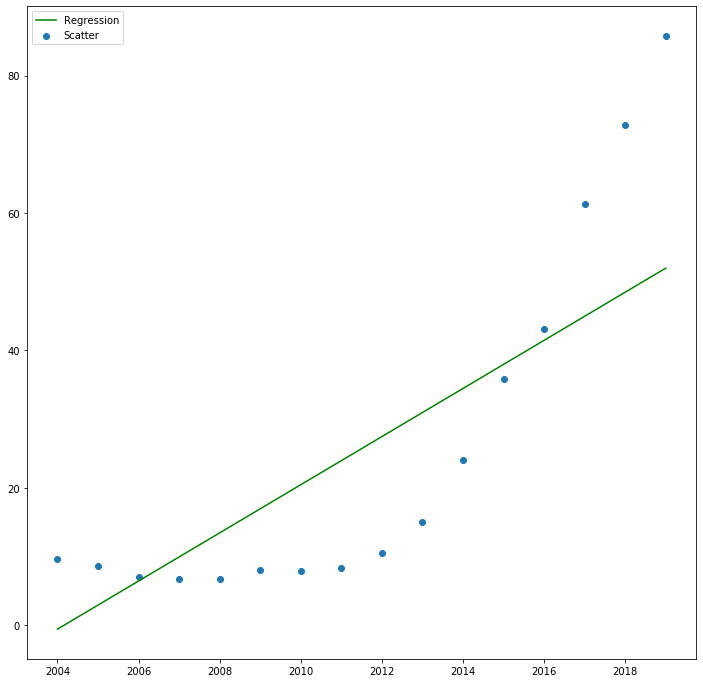

In [14]:
def regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    numerator = np.sum((x-xbar)*y-ybar)
    denominator = np.sum((x-xbar)**2)
    beta = numerator/denominator
    alpha = ybar - beta*xbar
    yhat = alpha + beta*x
    return yhat
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(dfLinear['Year'], dfLinear['Interest'], label="Scatter")
#y, x = dmatrices('Interest ~ Year', data=dfLinear, return_type='dataframe')
#slr = sm.OLS(y, x).fit()
#plt.plot(dfLinear['Year'], slr.fittedvalues, label='Stats Regression', color='pink')
plt.plot(dfLinear['Year'], regression(dfLinear['Year'], dfLinear['Interest']), label='Regression', color='green')
ax.legend()
plt.show()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in data science is positive or negative. Fully justify your responses.

$\hat{\beta}$ represents the change in interest in Data Science over time. The line in the graph has a positive slope, therefore there must be positive interest in data science over time.

**Part G**: What interest in data science does your simple linear regression model predict in the year 2025? What about in 2050? What are potential drawbacks to this model for interest in data science (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [15]:
def ABYregression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    numerator = np.sum((x-xbar)*y-ybar)
    denominator = np.sum((x-xbar)**2)
    beta = numerator/denominator
    alpha = ybar - beta*xbar
    yhat = alpha + beta*x
    return alpha, beta, yhat
alph, bet, yha = ABYregression(dfLinear['Year'], dfLinear['Interest'])
print('2025: ', alph+bet*2025)
print('2050: ', alph+bet*2050)

2025:  72.99406194295898
2050:  160.56285650623886


In 2025 it predicts 72 interest, whereas in 2050 it predicts 160 interest which doesn't make any sense. If 100 represents the peak popularity, then it can't be above that.

**Part H:** Compute a 80% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

The confidence interval is for $\beta$ because we are using $\hat\beta$ to compute the interval in which the true $\beta$ lies.
$$
C.I. = \hat\beta\pm t_{\alpha/2,n-2} * \sigma\sqrt{\frac{1}{(X_i - \bar X )^2}} \\
\sigma \approx s = \frac{\sum (\hat Y - Y_i )^2}{n-2}
$$
where $\alpha$ = .80 and n, Y, X, are all calculated from the data using python below. Y is the average interest from our dataframe, X is the year from our dataframe, and n is how many things we have in our dataframe.

In [16]:
sigma = yha - dfLinear['Interest']
sigma = sigma**2
s = np.sum(sigma)
s = s / (dfLinear['Interest'].count()-2)
t = stats.t.ppf(1-0.80/2, dfLinear['Interest'].count()-2)
sse = dfLinear['Year'] - dfLinear['Year'].mean()
sse = sse**2
ss = 1/sse.sum()
ss = np.sqrt(ss)
right = t*s*ss
print('80% Confidence Interval: [', bet-right, ',', bet+right, ']')

80% Confidence Interval: [ 0.17780849730313353 , 6.8276950677592545 ]


**Part I:** What proportion of the variation in mean annual interest in data science is explained by your linear regression model?

That's the definition of R^2
$$
R^2 = 1-\frac{\sum(\hat Y - Y_i)^2}{\sum (Y_i - \bar Y ) ^2}
$$
Plug that into python and we get the value below which is the answer.

In [17]:
numerator = yha - dfLinear['Interest']
numerator = numerator**2
num = np.sum(numerator)
denominator = dfLinear['Interest']-dfLinear['Interest'].mean()
denominator = denominator**2
denom = np.sum(denominator)
r = 1-(num/denom)
print('R^2, The proportion of the variation in mean annual interest explained by the linear regression model = ', r)

R^2, The proportion of the variation in mean annual interest explained by the linear regression model =  0.6796692730033292
